## Conolutional Neural Network (CNN) with Keras

In [2]:
! pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')


print('Found GPU at: {}'.format(device_name))

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.astype('float32')/255 # Normalizing the data
x_test.astype('float32')/255


x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation = 'tanh'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation = 'relu'),
    Dropout(.25),
    Flatten(),
    Dense(128, activation = 'sigmoid'),
    Dense(10, activation = 'softmax')
])

lr,batch_size,epochs = .001, 88,66
optim = tf.keras.optimizers.Adam(learning_rate = lr)
model.compile(
    optimizer = optim,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', 'AUC']
)
early_stop = EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = True)
history = model.fit(
    x_train, y_train,
    epochs = epochs,
    batch_size = batch_size,
    validation_data = (x_val, y_val),
    callbacks = [early_stop]
)

test_loss, test_accuracy, test_auc = model.evaluate(x_test, y_test, verbose = 2)
print(f'Test loss: {test_loss}\nTest accuracy: {test_accuracy}\nTest AUC: {test_auc}')

Found GPU at: /device:GPU:0
Epoch 1/66
546/546 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - AUC: 0.9788 - accuracy: 0.8592 - loss: 0.4938 - val_AUC: 0.9992 - val_accuracy: 0.9752 - val_loss: 0.0823
Epoch 2/66
546/546 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.9994 - accuracy: 0.9767 - loss: 0.0763 - val_AUC: 0.9992 - val_accuracy: 0.9802 - val_loss: 0.0644
Epoch 3/66
546/546 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9995 - accuracy: 0.9828 - loss: 0.0569 - val_AUC: 0.9996 - val_accuracy: 0.9838 - val_loss: 0.0490
Epoch 4/66
546/546 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9997 - accuracy: 0.9871 - loss: 0.0412 - val_AUC: 0.9998 - val_accuracy: 0.9878 - val_loss: 0.0396
Epoch 5/66
546/546 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9997 - accuracy: 0.9879 - loss: 0.0370 - val_AUC: 0.9995 - val_accuracy: 0.9877 - val_loss: 0.0406
Epoch 6/66
546/546 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.9997 - accuracy: 0.9902 - loss: 0.0323 - val_AUC: 0.9991 - val_accuracy: 0.9850 - val_loss: 0.0484
Epoch 7/66
5

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(y_test, axis = 1)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       1.00      0.97      0.98       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 978    0    0    0    0    0    1    1    0    0]
 [   1 1129    0    1    0    0    2    0    2    0]
 [   1    3 1024    0    0    0    0    4    0    0]
 [   0    0    1 1005    0    2    0    1    1    0]
 [   0    0    1    0  971   

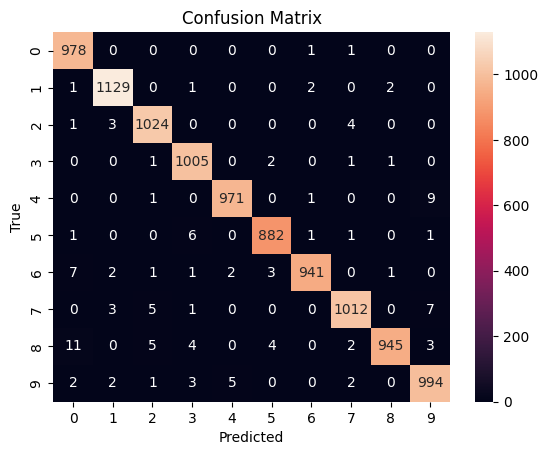

In [11]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
